In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spy

**Business Problem :**

The Management team at Multinational_Retail_Corporation wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

## **Non-Graphical Analysis**

In [ ]:
df = pd.read_csv("/content/sample_data/Multinational_Retail_Corporation.txt")
df.head(50)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
cols = ['Occupation', 'Marital_Status', 'Product_Category']
df[cols] = df[cols].astype('object')

In [ ]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
np.any(df.duplicated())

False

In [ ]:
df.describe()

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


In [ ]:
df.describe(include ='object')

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068
unique,3631,2,7,21,3,5,2,20
top,P00265242,M,26-35,4,B,1,0,5
freq,1880,414259,219587,72308,231173,193821,324731,150933


In [ ]:
df['User_ID'].nunique()

5891

In [ ]:
np.round(df['Gender'].value_counts(normalize = True) * 100, 2)

M    75.31
F    24.69
Name: Gender, dtype: float64

In [ ]:
np.round(df['Occupation'].value_counts(normalize = True) * 100, 2)


4     13.15
0     12.66
7     10.75
1      8.62
17     7.28
20     6.10
12     5.67
14     4.96
2      4.83
16     4.61
6      3.70
3      3.21
10     2.35
5      2.21
15     2.21
11     2.11
19     1.54
13     1.40
18     1.20
9      1.14
8      0.28
Name: Occupation, dtype: float64

In [ ]:
np.round(df['Stay_In_Current_City_Years'].value_counts(normalize = True) * 100, 2)

1     35.24
2     18.51
3     17.32
4+    15.40
0     13.53
Name: Stay_In_Current_City_Years, dtype: float64

In [ ]:
np.round(df['Product_Category'].value_counts(normalize = True).head(10) * 100, 2)

5     27.44
1     25.52
8     20.71
11     4.42
2      4.34
6      3.72
3      3.67
4      2.14
16     1.79
15     1.14
Name: Product_Category, dtype: float64

## **All Categories and there Types Total and Unique Value Count and Revenue and Avarage Revenue**



Helping Methods

In [ ]:
def get_count_per_category_type(df, category):
  print('{} Catgeory types total Count'.format(category))
  return df.groupby(by = [category])['User_ID'].count().reset_index().rename(columns = {'User_ID': 'Total_customer_count'})

def unique_customers_count_per_category(df, category):
  df_unique_customer_count = df.groupby(by=[category])['User_ID'].nunique().to_frame().reset_index().rename(columns = {'User_ID': 'Unique_customer_count'})
  df_unique_customer_count['percent_share'] = round(df_unique_customer_count['Unique_customer_count']/df_unique_customer_count['Unique_customer_count'].sum() *100, 2)
  print('{} Catgeory Unique Customer Count'.format(category))
  return df_unique_customer_count

def revenue_genrated_per_category(df, category):
  df_category_revenue = df.groupby(by=[category])['Purchase'].sum().to_frame().sort_values(by = 'Purchase', ascending = False).reset_index()
  df_category_revenue['percent_share'] = round(df_category_revenue['Purchase']/df_category_revenue['Purchase'].sum() *100, 2)
  print('Revenue Genrated Per {} Catgeory '.format(category))
  return df_category_revenue

def avarage_revenue_genrated_per_category(df, category):
  df_avarage_category_revenue = df.groupby(by=[category, 'User_ID'])['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase': 'Avg_purchase'})
  df_avarage_category_revenue = df_avarage_category_revenue.groupby(by = category)['Avg_purchase'].mean().to_frame().reset_index()
  print('Avarage (Mean) Genrated Per {} Catgeory '.format(category))
  return df_avarage_category_revenue


Category Gender

In [ ]:
# Total customers count per gender type
print(get_count_per_category_type(df, 'Gender').to_markdown() + '\n')

# Unique customers count per gender type
df_gender_dist = unique_customers_count_per_category(df, 'Gender')
print(df_gender_dist.to_markdown() + '\n')

# Total Revenue count per gender type
df_gender_revenue = revenue_genrated_per_category(df, 'Gender')
print(df_gender_revenue.to_markdown() + '\n')

# Avg Revenue count per gender type
df_gender_avg_revenue = avarage_revenue_genrated_per_category(df, 'Gender')
print(df_gender_avg_revenue.to_markdown() + '\n')

Gender Catgeory types total Count
|    | Gender   |   Total_customer_count |
|---:|:---------|-----------------------:|
|  0 | F        |                 135809 |
|  1 | M        |                 414259 |

Gender Catgeory Unique Customer Count
|    | Gender   |   Unique_customer_count |   percent_share |
|---:|:---------|------------------------:|----------------:|
|  0 | F        |                    1666 |           28.28 |
|  1 | M        |                    4225 |           71.72 |

Revenue Genrated Per Gender Catgeory 
|    | Gender   |   Purchase |   percent_share |
|---:|:---------|-----------:|----------------:|
|  0 | M        | 3909580100 |           76.72 |
|  1 | F        | 1186232642 |           23.28 |

Avarage (Mean) Genrated Per Gender Catgeory 
|    | Gender   |   Avg_purchase |
|---:|:---------|---------------:|
|  0 | F        |         712024 |
|  1 | M        |         925344 |



Category Marital Status

In [ ]:
# Total customers count per gender type
print(get_count_per_category_type(df, 'Marital_Status').to_markdown() + '\n')

# Unique customers count per gender type
df_marital_status_dist = unique_customers_count_per_category(df, 'Marital_Status')
print(df_marital_status_dist.to_markdown() + '\n')

# Total Revenue count per gender type
df_marital_status_revenue = revenue_genrated_per_category(df, 'Marital_Status')
print(df_marital_status_revenue.to_markdown() + '\n')

# Avg Revenue count per gender type
df_marital_status_avg_revenue = avarage_revenue_genrated_per_category(df, 'Marital_Status')
print(df_marital_status_avg_revenue.to_markdown() + '\n')

Marital_Status Catgeory types total Count
|    |   Marital_Status |   Total_customer_count |
|---:|-----------------:|-----------------------:|
|  0 |                0 |                 324731 |
|  1 |                1 |                 225337 |

Marital_Status Catgeory Unique Customer Count
|    |   Marital_Status |   Unique_customer_count |   percent_share |
|---:|-----------------:|------------------------:|----------------:|
|  0 |                0 |                    3417 |              58 |
|  1 |                1 |                    2474 |              42 |

Revenue Genrated Per Marital_Status Catgeory 
|    |   Marital_Status |    Purchase |   percent_share |
|---:|-----------------:|------------:|----------------:|
|  0 |                0 | 3.00893e+09 |           59.05 |
|  1 |                1 | 2.08689e+09 |           40.95 |

Avarage (Mean) Genrated Per Marital_Status Catgeory 
|    |   Marital_Status |   Avg_purchase |
|---:|-----------------:|---------------:|
|  0 |  

Category Age

In [ ]:
# Total customers count per gender type
print(get_count_per_category_type(df, 'Age').to_markdown() + '\n')

# Unique customers count per gender type
df_age_dist = unique_customers_count_per_category(df, 'Age')
print(df_age_dist.to_markdown() + '\n')

# Total Revenue count per gender type
df_age_revenue = revenue_genrated_per_category(df, 'Age')
print(df_age_revenue.to_markdown() + '\n')

# Avg Revenue count per gender type
df_age_avg_revenue = avarage_revenue_genrated_per_category(df, 'Age')
print(df_age_avg_revenue.to_markdown() + '\n')


Age Catgeory types total Count
|    | Age   |   Total_customer_count |
|---:|:------|-----------------------:|
|  0 | 0-17  |                  15102 |
|  1 | 18-25 |                  99660 |
|  2 | 26-35 |                 219587 |
|  3 | 36-45 |                 110013 |
|  4 | 46-50 |                  45701 |
|  5 | 51-55 |                  38501 |
|  6 | 55+   |                  21504 |

Age Catgeory Unique Customer Count
|    | Age   |   Unique_customer_count |   percent_share |
|---:|:------|------------------------:|----------------:|
|  0 | 0-17  |                     218 |            3.7  |
|  1 | 18-25 |                    1069 |           18.15 |
|  2 | 26-35 |                    2053 |           34.85 |
|  3 | 36-45 |                    1167 |           19.81 |
|  4 | 46-50 |                     531 |            9.01 |
|  5 | 51-55 |                     481 |            8.16 |
|  6 | 55+   |                     372 |            6.31 |

Revenue Genrated Per Age Catgeory 
|    |

Category Stay In Current City Years

In [ ]:
# Total customers count per gender type
print(get_count_per_category_type(df, 'Stay_In_Current_City_Years').to_markdown() + '\n')

# Unique customers count per gender type
df_siccy_dist = unique_customers_count_per_category(df, 'Stay_In_Current_City_Years')
print(df_siccy_dist.to_markdown() + '\n')

# Total Revenue count per gender type
df_siccy_revenue = revenue_genrated_per_category(df, 'Stay_In_Current_City_Years')
print(df_siccy_revenue.to_markdown() + '\n')

# Avg Revenue count per gender type
df_siccy_avg_revenue = avarage_revenue_genrated_per_category(df, 'Stay_In_Current_City_Years')
print(df_siccy_avg_revenue.to_markdown() + '\n')


Stay_In_Current_City_Years Catgeory types total Count
|    | Stay_In_Current_City_Years   |   Total_customer_count |
|---:|:-----------------------------|-----------------------:|
|  0 | 0                            |                  74398 |
|  1 | 1                            |                 193821 |
|  2 | 2                            |                 101838 |
|  3 | 3                            |                  95285 |
|  4 | 4+                           |                  84726 |

Stay_In_Current_City_Years Catgeory Unique Customer Count
|    | Stay_In_Current_City_Years   |   Unique_customer_count |   percent_share |
|---:|:-----------------------------|------------------------:|----------------:|
|  0 | 0                            |                     772 |           13.1  |
|  1 | 1                            |                    2086 |           35.41 |
|  2 | 2                            |                    1145 |           19.44 |
|  3 | 3                            

Category City Category

In [ ]:
# Total customers count per gender type
print(get_count_per_category_type(df, 'City_Category').to_markdown() + '\n')

# Unique customers count per gender type
df_city_category_dist = unique_customers_count_per_category(df, 'City_Category')
print(df_city_category_dist.to_markdown() + '\n')

# Total Revenue count per gender type
df_city_category_revenue = revenue_genrated_per_category(df, 'City_Category')
print(df_city_category_revenue.to_markdown() + '\n')

# Avg Revenue count per gender type
df_city_category_avg_revenue = avarage_revenue_genrated_per_category(df, 'City_Category')
print(df_city_category_avg_revenue.to_markdown() + '\n')

City_Category Catgeory types total Count
|    | City_Category   |   Total_customer_count |
|---:|:----------------|-----------------------:|
|  0 | A               |                 147720 |
|  1 | B               |                 231173 |
|  2 | C               |                 171175 |

City_Category Catgeory Unique Customer Count
|    | City_Category   |   Unique_customer_count |   percent_share |
|---:|:----------------|------------------------:|----------------:|
|  0 | A               |                    1045 |           17.74 |
|  1 | B               |                    1707 |           28.98 |
|  2 | C               |                    3139 |           53.28 |

Revenue Genrated Per City_Category Catgeory 
|    | City_Category   |   Purchase |   percent_share |
|---:|:----------------|-----------:|----------------:|
|  0 | B               | 2115533605 |           41.52 |
|  1 | C               | 1663807476 |           32.65 |
|  2 | A               | 1316471661 |           

Category Product Category

In [ ]:
# Total customers count per gender type
print(get_count_per_category_type(df, 'Product_Category').to_markdown() + '\n')

# Unique customers count per gender type
df_product_category_dist = unique_customers_count_per_category(df, 'Product_Category')
print(df_product_category_dist.to_markdown() + '\n')

# Total Revenue count per gender type
df_product_category_revenue = revenue_genrated_per_category(df, 'Product_Category')
print(df_product_category_revenue.to_markdown() + '\n')

# Avg Revenue count per gender type
df_product_category_avg_revenue = avarage_revenue_genrated_per_category(df, 'Product_Category')
print(df_product_category_avg_revenue.to_markdown() + '\n')

Product_Category Catgeory types total Count
|    |   Product_Category |   Total_customer_count |
|---:|-------------------:|-----------------------:|
|  0 |                  1 |                 140378 |
|  1 |                  2 |                  23864 |
|  2 |                  3 |                  20213 |
|  3 |                  4 |                  11753 |
|  4 |                  5 |                 150933 |
|  5 |                  6 |                  20466 |
|  6 |                  7 |                   3721 |
|  7 |                  8 |                 113925 |
|  8 |                  9 |                    410 |
|  9 |                 10 |                   5125 |
| 10 |                 11 |                  24287 |
| 11 |                 12 |                   3947 |
| 12 |                 13 |                   5549 |
| 13 |                 14 |                   1523 |
| 14 |                 15 |                   6290 |
| 15 |                 16 |                   9828 |
| 

## **Visual Analysis**

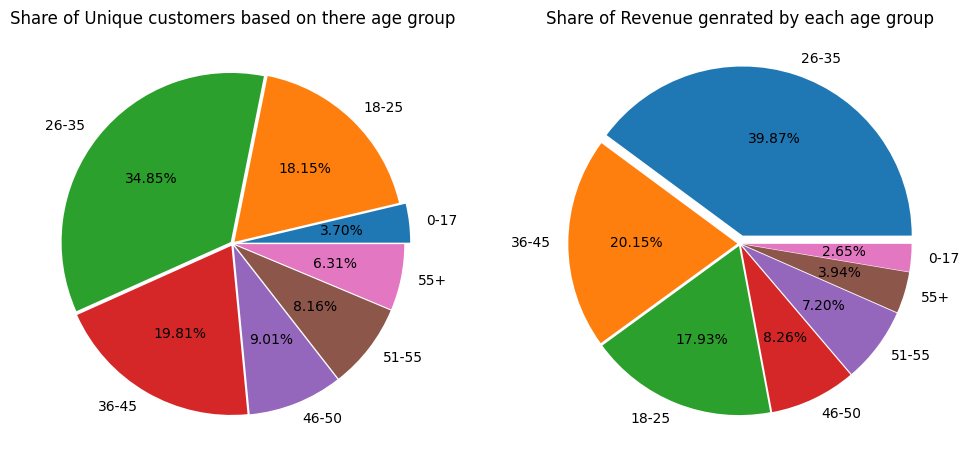

In [ ]:
plt.figure(figsize=(12,16))
plt.subplot(1,2,1)
plt.pie(x=df_age_dist['percent_share'], labels=df_age_dist['Age'], explode=[0.05] + [0.015] *6, autopct='%.2f%%')
plt.title('Share of Unique customers based on there age group')

plt.subplot(1,2,2)
plt.pie(x=df_age_revenue['percent_share'], labels=df_age_revenue['Age'], explode=[0.05] + [0.015] *6, autopct='%.2f%%')
plt.title('Share of Revenue genrated by each age group')
plt.show()

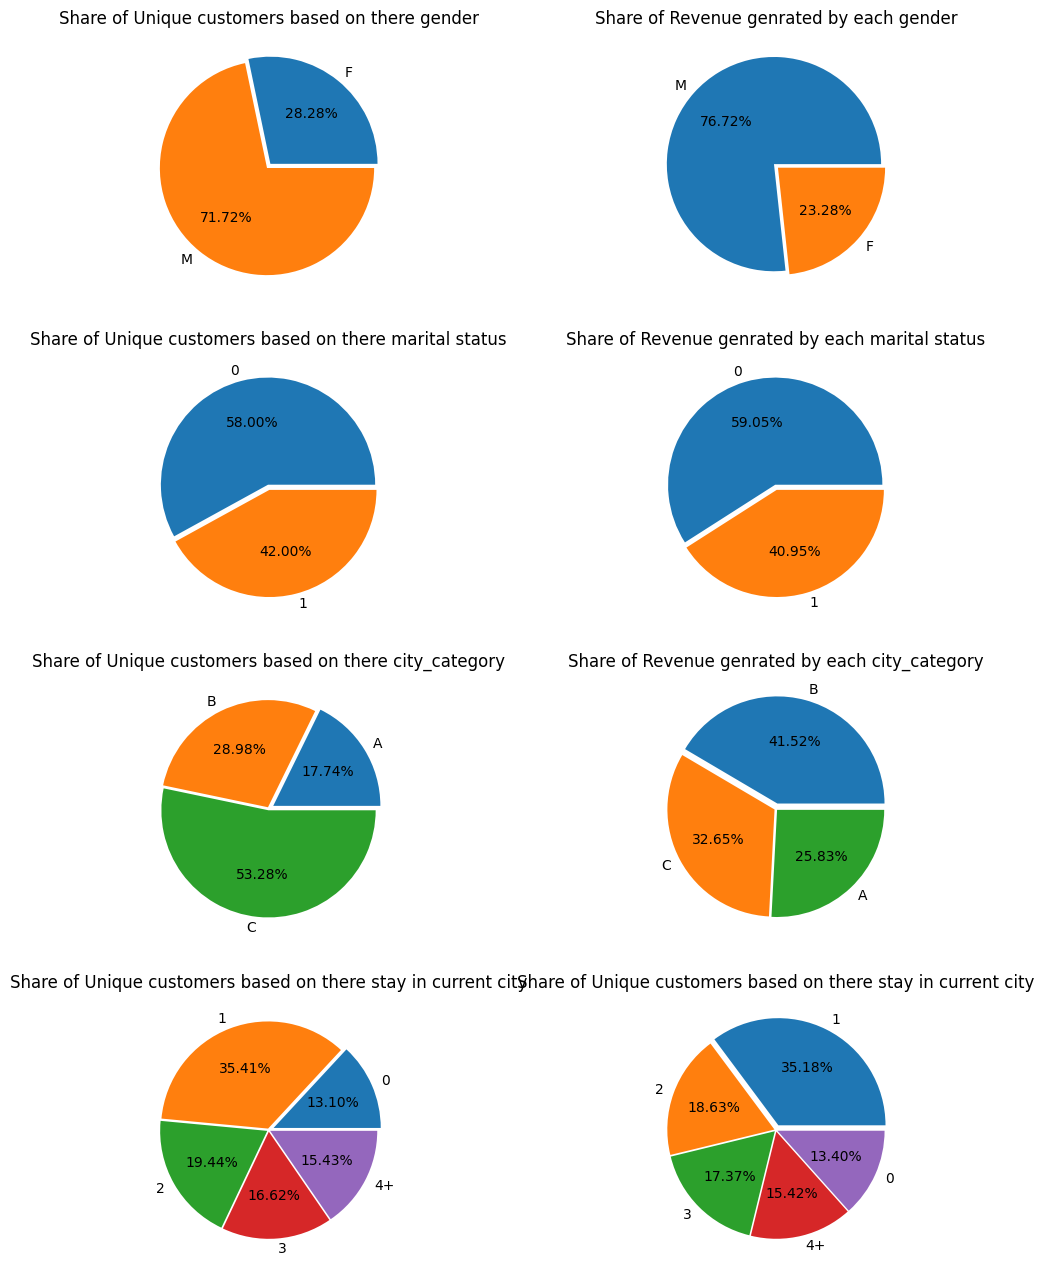

In [ ]:
plt.figure(figsize=(12,16))
plt.subplot(4,2,1)
plt.pie(x=df_gender_dist['percent_share'], labels=df_gender_dist['Gender'], explode=[0.025] * 2, autopct='%.2f%%')
plt.title('Share of Unique customers based on there gender')

plt.subplot(4,2,2)
plt.pie(x=df_gender_revenue['percent_share'], labels=df_gender_revenue['Gender'], explode=[0.025] * 2, autopct='%.2f%%')
plt.title('Share of Revenue genrated by each gender')

plt.subplot(4,2,3)
plt.pie(x=df_marital_status_dist['percent_share'], labels=df_marital_status_dist['Marital_Status'], explode=[0.025] * 2, autopct='%.2f%%')
plt.title('Share of Unique customers based on there marital status')

plt.subplot(4,2,4)
plt.pie(x=df_marital_status_revenue['percent_share'], labels=df_marital_status_revenue['Marital_Status'], explode=[0.025] * 2, autopct='%.2f%%')
plt.title('Share of Revenue genrated by each marital status')

plt.subplot(4,2,5)
plt.pie(x=df_city_category_dist['percent_share'], labels=df_city_category_dist['City_Category'], explode=[0.05] + [0.015] *2, autopct='%.2f%%')
plt.title('Share of Unique customers based on there city_category')

plt.subplot(4,2,6)
plt.pie(x=df_city_category_revenue['percent_share'], labels=df_city_category_revenue['City_Category'], explode=[0.05] + [0.015] *2, autopct='%.2f%%')
plt.title('Share of Revenue genrated by each city_category')

plt.subplot(4,2,7)
plt.pie(x=df_siccy_dist['percent_share'], labels=df_siccy_dist['Stay_In_Current_City_Years'], explode=[0.05] + [0.015] *4, autopct='%.2f%%')
plt.title('Share of Unique customers based on there stay in current city')

plt.subplot(4,2,8)
plt.pie(x=df_siccy_revenue['percent_share'], labels=df_siccy_revenue['Stay_In_Current_City_Years'], explode=[0.05] + [0.015] *4, autopct='%.2f%%')
plt.title('Share of Unique customers based on there stay in current city')

plt.show()

[]

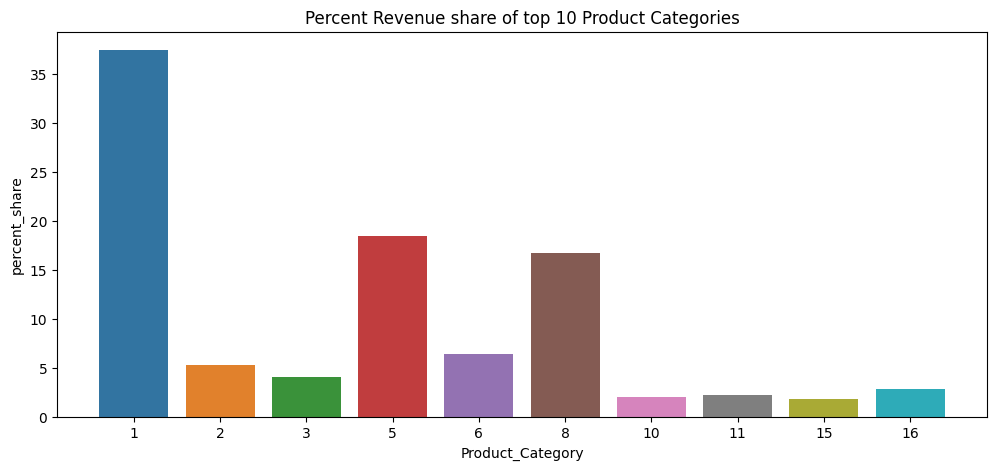

In [ ]:
plt.figure(figsize = (12, 5))
sns.barplot(data = df_product_category_revenue, x = df_product_category_revenue.head(10)['Product_Category'], y = df_product_category_revenue.head(10)['percent_share'])
plt.title('Percent Revenue share of top 10 Product Categories')
plt.plot()

[]

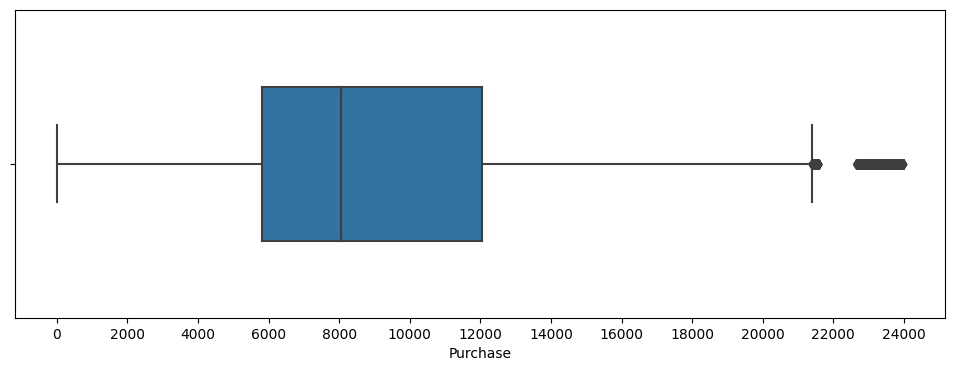

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x='Purchase', width=0.5)
plt.xticks(np.arange(0, 25001, 2000))
plt.plot()

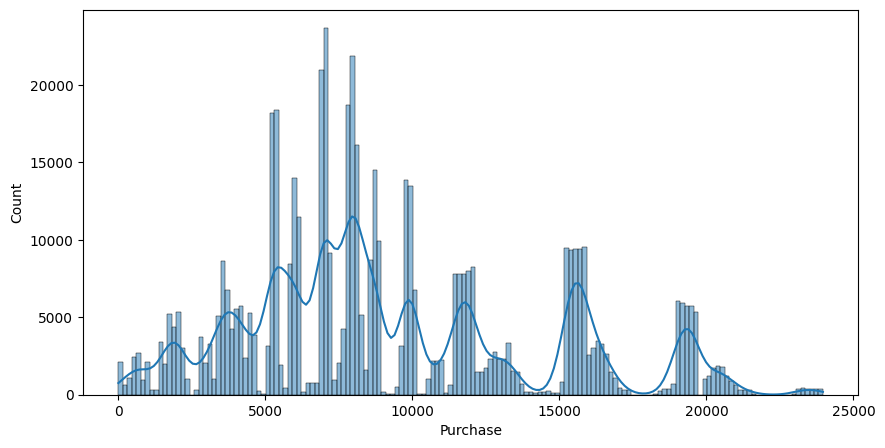

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Purchase', kde=True)
plt.show()

[]

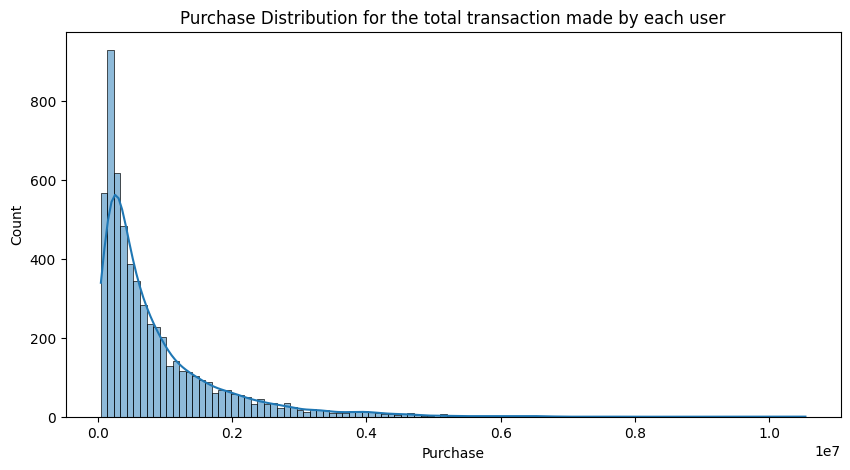

In [ ]:
plt.figure(figsize=(10,5))
df_customer=df.groupby(by='User_ID')['Purchase'].sum()
sns.histplot(data=df_customer, kde=True)
plt.title('Purchase Distribution for the total transaction made by each user')
plt.plot()

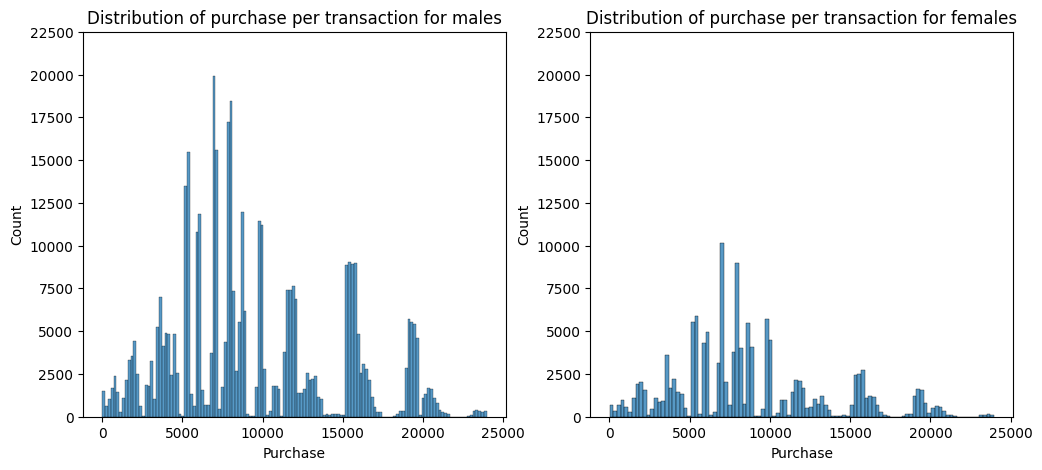

In [ ]:
plt.figure(figsize = (12, 5))

plt.subplot(1,2,1)
df_male=df[df['Gender']=='M']
sns.histplot(data=df_male, x='Purchase')
plt.title('Distribution of purchase per transaction for males')
plt.yticks(np.arange(0, 22550, 2500))

plt.subplot(1,2,2)
df_female=df[df['Gender']=='F']
sns.histplot(data=df_female, x='Purchase')
plt.title('Distribution of purchase per transaction for females')
plt.yticks(np.arange(0, 22550, 2500))

plt.show()

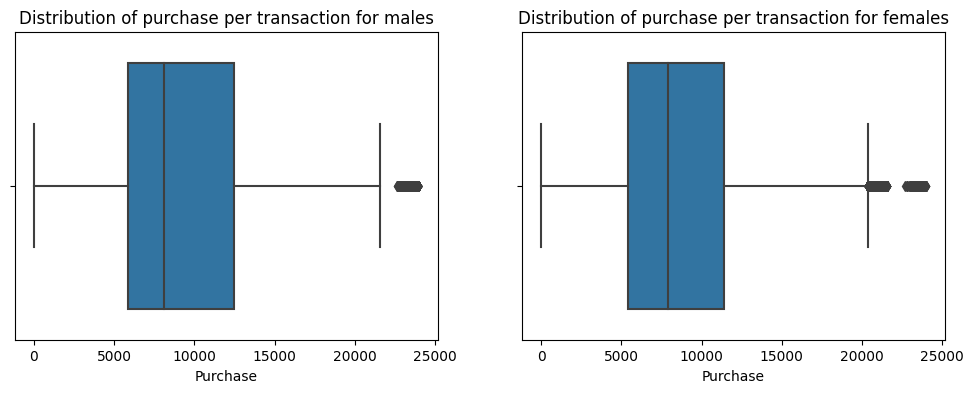

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.title('Distribution of purchase per transaction for males')
sns.boxplot(data=df_male, x='Purchase')

plt.subplot(1,2,2)
plt.title('Distribution of purchase per transaction for females')
sns.boxplot(data=df_female, x='Purchase')
plt.show()

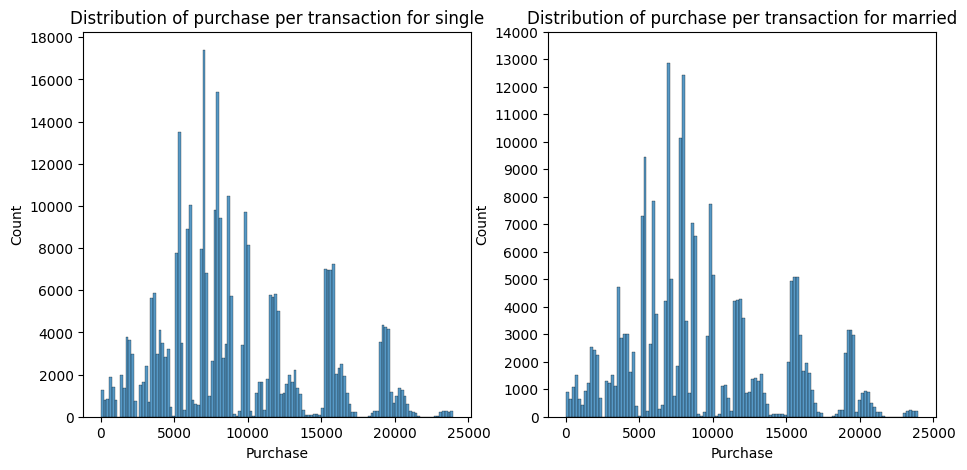

In [ ]:
plt.figure(figsize=(11, 5))

plt.subplot(1,2,1)
df_single=df[df['Marital_Status']==0]
sns.histplot(data=df_single, x='Purchase')
plt.title('Distribution of purchase per transaction for single')
plt.yticks(np.arange(0, 20000, 2000))

plt.subplot(1,2,2)
df_married=df[df['Marital_Status']==1]
sns.histplot(data=df_married, x='Purchase')
plt.title('Distribution of purchase per transaction for married')
plt.yticks(np.arange(0, 15000, 1000))

plt.show()

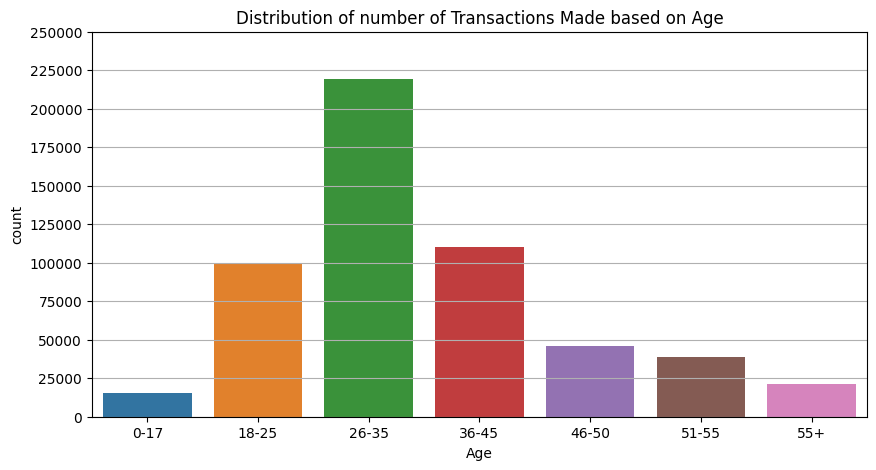

In [ ]:
plt.figure(figsize=(10, 5))
plt.grid('y')
sns.countplot(data=df, x='Age', order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
plt.title('Distribution of number of Transactions Made based on Age')
plt.yticks(np.arange(0, 250001, 25000))
plt.show()

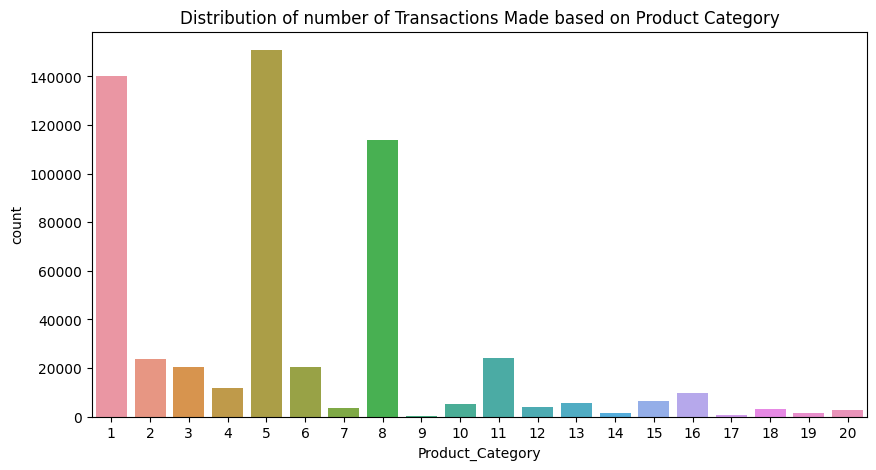

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Product_Category')
plt.title('Distribution of number of Transactions Made based on Product Category')
plt.show()

[]

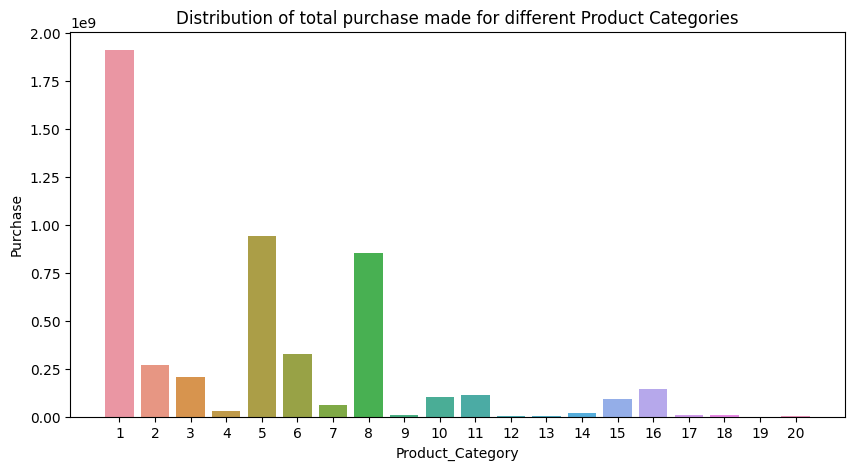

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_product_category_revenue,x='Product_Category', y='Purchase')
plt.title('Distribution of total purchase made for different Product Categories')
plt.plot()

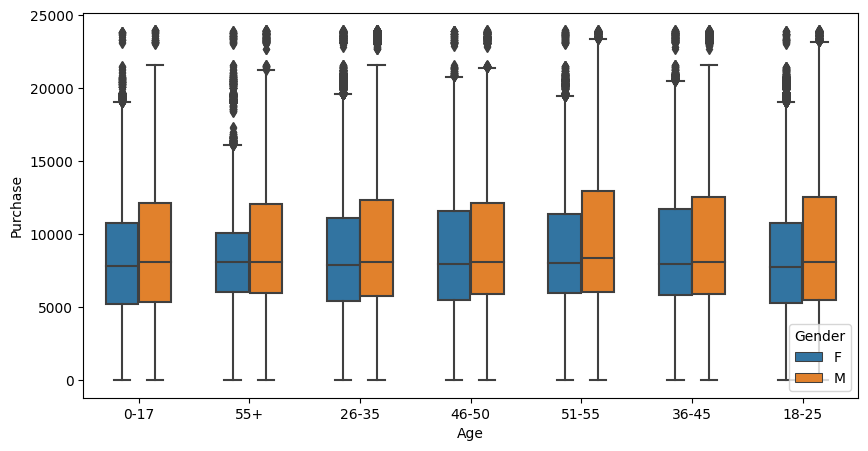

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Age', y ='Purchase', hue='Gender', width = 0.6)
plt.show()

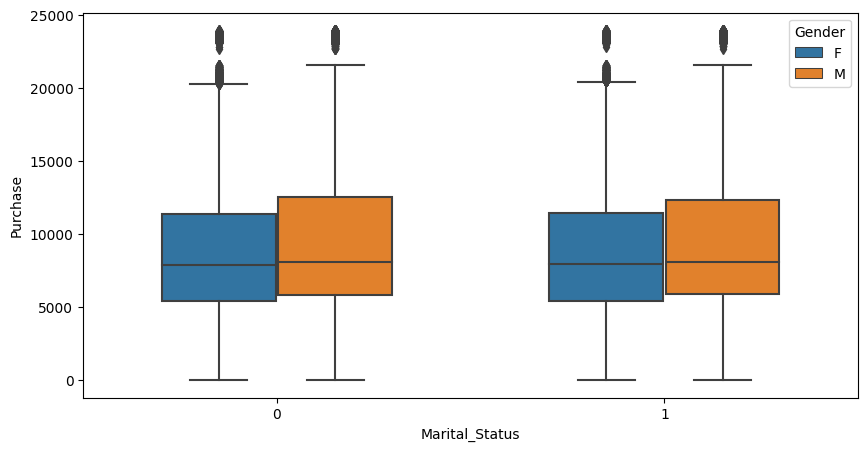

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Marital_Status', y ='Purchase', hue='Gender', width = 0.6)
plt.show()

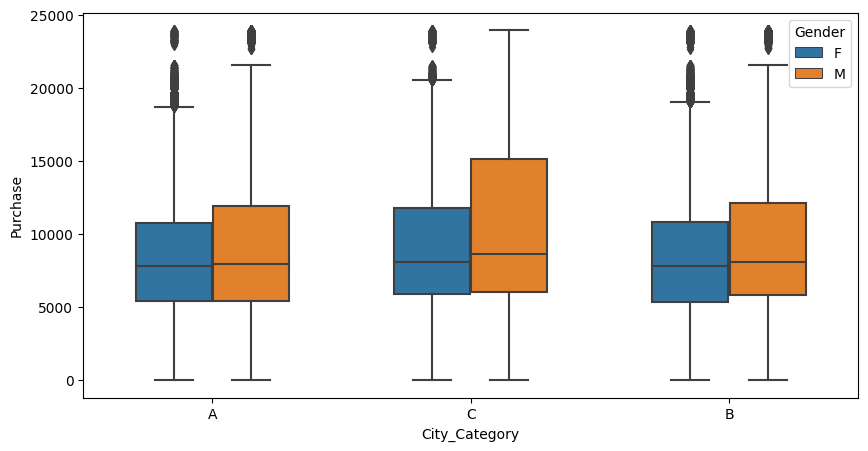

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='City_Category', y ='Purchase', hue='Gender', width = 0.6)
plt.show()

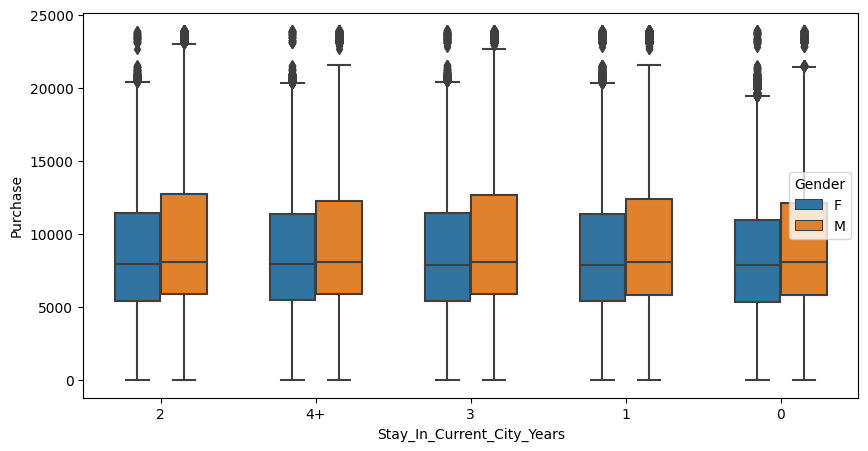

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Stay_In_Current_City_Years', y ='Purchase', hue='Gender', width = 0.6)
plt.show()

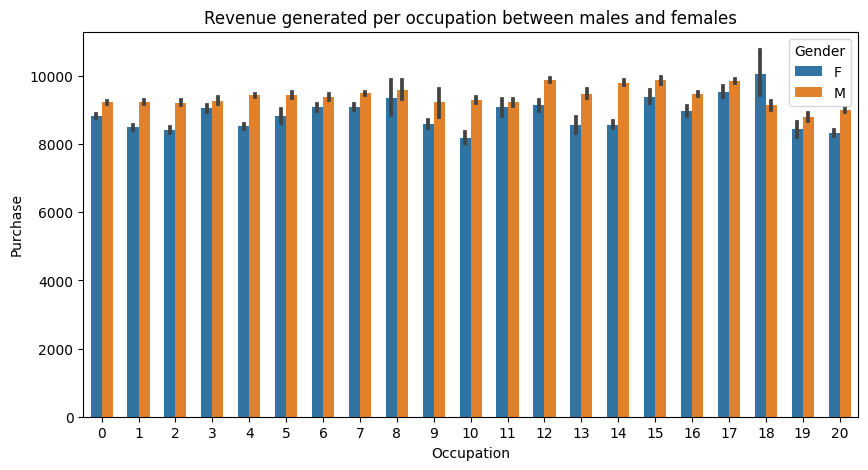

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Occupation', y ='Purchase', hue='Gender', width = 0.6)
plt.title('Revenue generated per occupation between males and females')
plt.show()

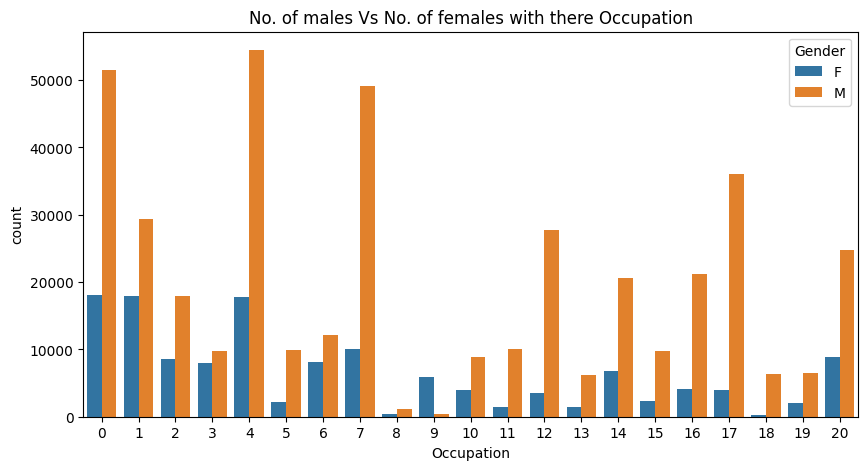

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Occupation', hue='Gender')
plt.title('No. of males Vs No. of females with there Occupation')
plt.show()

## **Outlier treatment**

Purchase Outlier treatment using IQR (inter quartiles range) <br>
IQR = Q3 - Q1 <br>
lower bound = (Q1–1.5 * IQR)<br>
upper bound = (Q3+1.5 * IQR)


In [ ]:
purchase_iqr = df['Purchase'].quantile(0.75) - df['Purchase'].quantile(0.25)
lower_bound = df['Purchase'].quantile(0.25) - 1.5 * purchase_iqr
upper_bound = df['Purchase'].quantile(0.75) + 1.5 * purchase_iqr
df = df[(df['Purchase'] > lower_bound) & (df['Purchase'] < upper_bound)]


[]

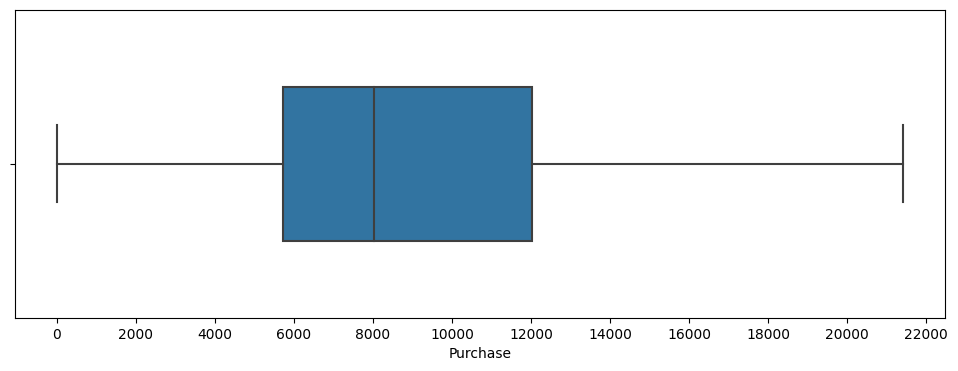

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=df, x='Purchase', width=0.5)
plt.xticks(np.arange(0, 25001, 2000))
plt.plot()

In [ ]:
print('Mean Purchase for Female & Male Customer After outlier treatment')
print('='*80)
print(df.groupby(by=['Gender', 'User_ID'])['Purchase'].sum().to_frame().reset_index().rename(columns = {'Purchase': 'Avg_purchase'}).groupby('Gender')["Avg_purchase"].mean().to_frame().reset_index().rename(columns = {'Avg_purchase': 'Mean'}))

Mean Purchase for Female & Male Customer After outlier treatment
  Gender           Mean
0      F  703781.063025
1      M  913870.843787


## **Mean Purchase For Different Catgeories**

helping methods

In [ ]:
sample_size = 1000
categoryOne = []
categoryTwo = []


def bootStrapedMeanForCategoricalVar(categoryOneDf, categoryTwoDf):
  for i in range(1000):
    categoryOne.append(round(categoryOneDf.sample(sample_size, replace=True)['Purchase'].mean(), 2))
    categoryTwo.append(round(categoryTwoDf.sample(sample_size, replace=True)['Purchase'].mean(), 2))
  return categoryOne, categoryTwo



def cal_CI(category_means, c):
  sample_mean = np.mean(category_means)
  sample_std = np.std(category_means)
  if c == 90:
    return (sample_mean + spy.norm.ppf(0.05)* sample_std, sample_mean + spy.norm.ppf(0.95)* sample_std)
  elif c == 95:
    return (sample_mean + spy.norm.ppf(0.025)* sample_std, sample_mean + spy.norm.ppf(0.975)* sample_std)
  elif c == 99:
    return (sample_mean + spy.norm.ppf(0.005)* sample_std, sample_mean + spy.norm.ppf(0.995)* sample_std)
  else :
    return 'Invalid Confidence Interval'

def sample_mean(category_means):
  return np.mean(category_means)



CTL for Purchase Amount Given Customer Gender

In [ ]:
df_gender = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
df_gender = df_gender.reset_index()

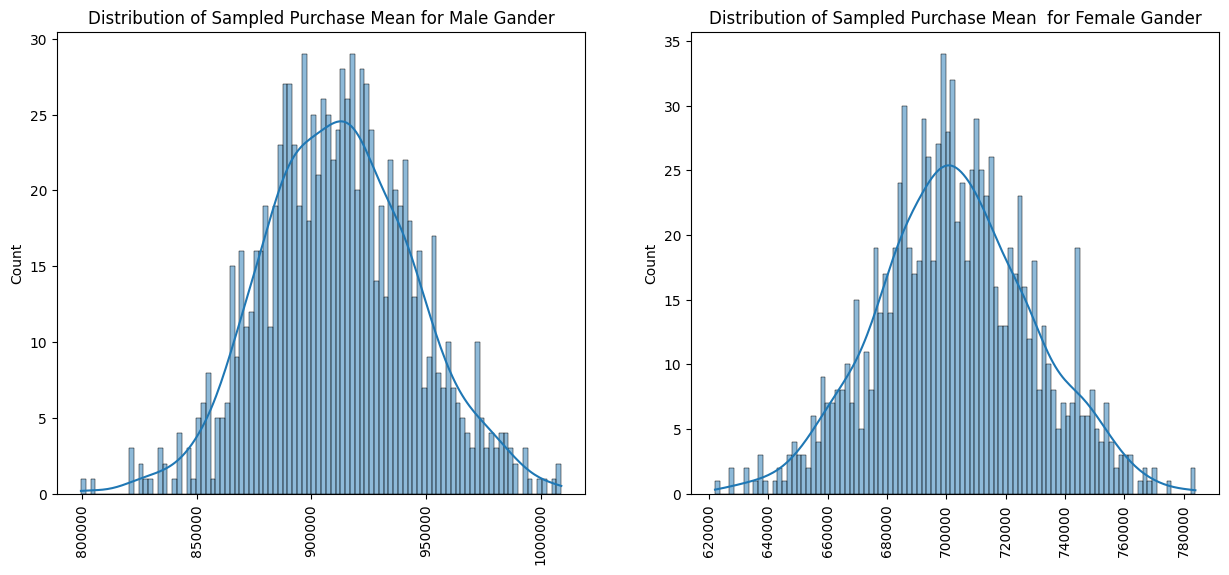

In [ ]:
df_male = df_gender[df_gender['Gender']=='M']
df_female = df_gender[df_gender['Gender']=='F']
male_purchase_mean, female_purchase_mean = bootStrapedMeanForCategoricalVar(df_male, df_female)

fig =  plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(data=male_purchase_mean,  kde = True, bins=100)
plt.title('Distribution of Sampled Purchase Mean for Male Gander')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='x')

plt.subplot(1,2,2)
sns.histplot(data=female_purchase_mean,  kde = True, bins=100)
plt.title('Distribution of Sampled Purchase Mean  for Female Gander')
plt.xticks(rotation=90)

plt.show()

In [ ]:
(lower_limit_90, upper_limit_90) = cal_CI(male_purchase_mean , 90)
(lower_limit_95, upper_limit_95) = cal_CI(male_purchase_mean , 95)
(lower_limit_99, upper_limit_99) = cal_CI(male_purchase_mean , 99)


print('Male Customers Mean Purchase By 90 % Confidence ({}, {})'.format(round(lower_limit_90, 2), round(upper_limit_90, 2)))
print('Male Customers Mean Purchase By 95 % Confidence ({}, {})'.format(round(lower_limit_95, 2), round(upper_limit_95, 2)))
print('Male Customers Mean Purchase By 99 % Confidence ({}, {})'.format(round(lower_limit_99, 2), round(upper_limit_99, 2)))
print('Sample Mean for Male Customers',sample_mean(male_purchase_mean))

Male Customers Mean Purchase By 90 % Confidence (857912.67, 966117.34)
Male Customers Mean Purchase By 95 % Confidence (847548.1, 976481.91)
Male Customers Mean Purchase By 99 % Confidence (827291.13, 996738.88)
Sample Mean for Male Customers 912015.00697


In [ ]:
(lower_limit_90, upper_limit_90) = cal_CI(female_purchase_mean , 90)
(lower_limit_95, upper_limit_95) = cal_CI(female_purchase_mean , 95)
(lower_limit_99, upper_limit_99) = cal_CI(female_purchase_mean , 99)

print('Female Customers Mean Purchase By 90 % Confidence ({}, {})'.format(round(lower_limit_90, 2), round(upper_limit_90, 2)))
print('Female Customers Mean Purchase By 95 % Confidence ({}, {})'.format(round(lower_limit_95, 2), round(upper_limit_95, 2)))
print('Female Customers Mean Purchase By 99 % Confidence ({}, {})'.format(round(lower_limit_99, 2), round(upper_limit_99, 2)))
print('Sample Mean for Male Customers',sample_mean(female_purchase_mean))

Female Customers Mean Purchase By 90 % Confidence (660003.85, 746019.35)
Female Customers Mean Purchase By 95 % Confidence (651764.7, 754258.49)
Female Customers Mean Purchase By 99 % Confidence (635661.76, 770361.44)
Sample Mean for Male Customers 703011.5993800001


CTL for Purchase Amount Given Customer Marital Status

In [ ]:
df_marital_status = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
df_marital_status = df_marital_status.reset_index()

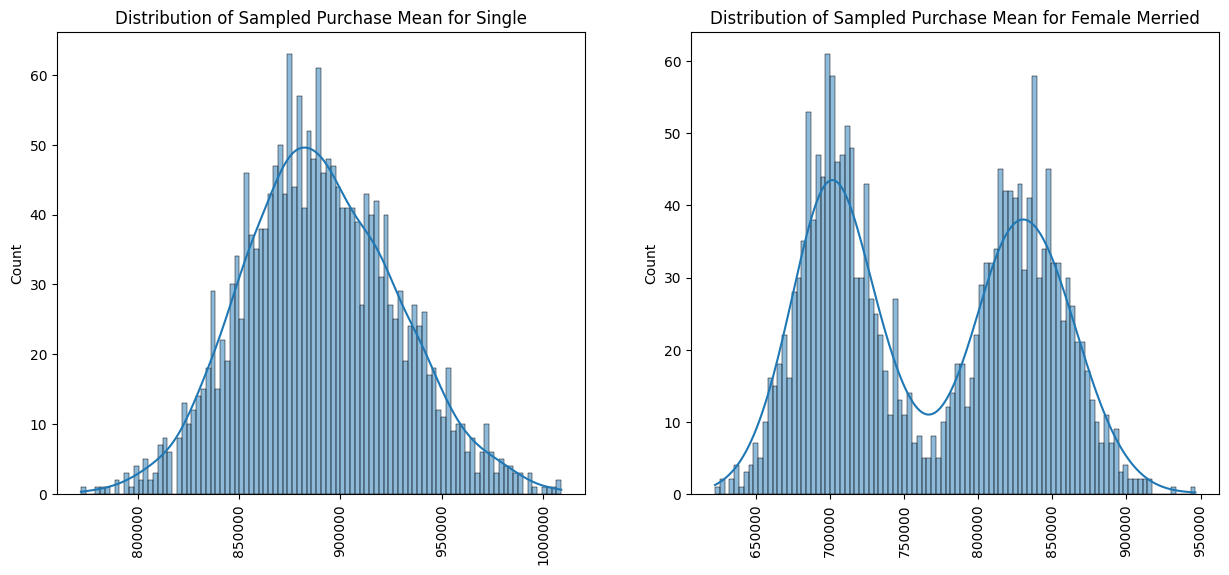

In [ ]:
df_single = df_marital_status[df_marital_status['Marital_Status']==0]
df_married = df_marital_status[df_marital_status['Marital_Status']==1]
single_purchase_mean, married_purchase_mean = bootStrapedMeanForCategoricalVar(df_single, df_married)

fig =  plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(data=single_purchase_mean,  kde = True, bins=100)
plt.title('Distribution of Sampled Purchase Mean for Single')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='x')

plt.subplot(1,2,2)
sns.histplot(data=married_purchase_mean,  kde = True, bins=100)
plt.title('Distribution of Sampled Purchase Mean for Female Merried')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='x')

plt.show()

In [ ]:
(lower_limit_90, upper_limit_90) = cal_CI(single_purchase_mean , 90)
(lower_limit_95, upper_limit_95) = cal_CI(single_purchase_mean , 95)
(lower_limit_99, upper_limit_99) = cal_CI(single_purchase_mean , 99)


print('Single Customers Mean Purchase By 90 % Confidence ({}, {})'.format(round(lower_limit_90, 2), round(upper_limit_90, 2)))
print('Single Customers Mean Purchase By 95 % Confidence ({}, {})'.format(round(lower_limit_95, 2), round(upper_limit_95, 2)))
print('Single Customers Mean Purchase By 99 % Confidence ({}, {})'.format(round(lower_limit_99, 2), round(upper_limit_99, 2)))
print('Sample Mean for Single Customers',sample_mean(single_purchase_mean))

Single Customers Mean Purchase By 90 % Confidence (827650.85, 952545.18)
Single Customers Mean Purchase By 95 % Confidence (815687.62, 964508.41)
Single Customers Mean Purchase By 99 % Confidence (792306.18, 987889.85)
Sample Mean for Single Customers 890098.01526


In [ ]:
(lower_limit_90, upper_limit_90) = cal_CI(married_purchase_mean , 90)
(lower_limit_95, upper_limit_95) = cal_CI(married_purchase_mean , 95)
(lower_limit_99, upper_limit_99) = cal_CI(married_purchase_mean , 99)

print('Married Customers Mean Purchase By 90 % Confidence ({}, {})'.format(round(lower_limit_90, 2), round(upper_limit_90, 2)))
print('Married Customers Mean Purchase By 95 % Confidence ({}, {})'.format(round(lower_limit_95, 2), round(upper_limit_95, 2)))
print('Married Customers Mean Purchase By 99 % Confidence ({}, {})'.format(round(lower_limit_99, 2), round(upper_limit_99, 2)))
print('Sample Mean for Married Customers',sample_mean(married_purchase_mean))

Married Customers Mean Purchase By 90 % Confidence (651675.46, 883311.63)
Married Customers Mean Purchase By 95 % Confidence (629487.79, 905499.3)
Married Customers Mean Purchase By 99 % Confidence (586123.24, 948863.85)
Sample Mean for Married Customers 767493.5450100001


CTL for Purchase Amount Given Customer Age Groups

In [ ]:
def getAgeGroupSampleMean(ageGroup):
  means = []
  for i in range(1000):
    means.append(round(ageGroup.sample(sample_size, replace=True)['Purchase'].mean(), 2))
  return means

In [ ]:
df_age = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
df_age = df_age.reset_index()

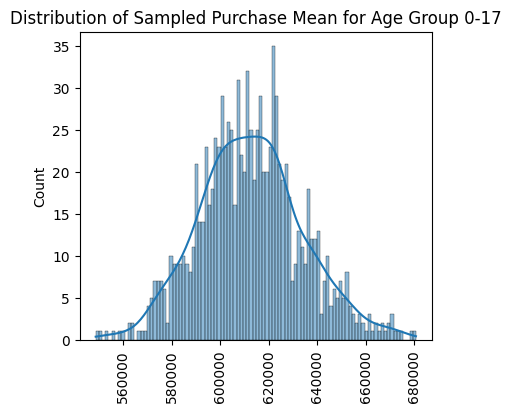



Age Group 0-17 Customers Mean Purchase By 90 % Confidence (577638.32, 647705.32)
Age Group 0-17 Customers Mean Purchase By 95 % Confidence (570926.83, 654416.81)
Age Group 0-17 Customers Mean Purchase By 99 % Confidence (557809.6, 667534.03)





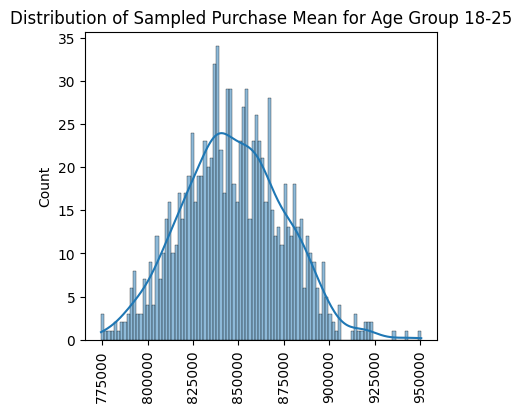



Age Group 18-25 Customers Mean Purchase By 90 % Confidence (800833.02, 893093.84)
Age Group 18-25 Customers Mean Purchase By 95 % Confidence (791995.66, 901931.2)
Age Group 18-25 Customers Mean Purchase By 99 % Confidence (774723.53, 919203.32)





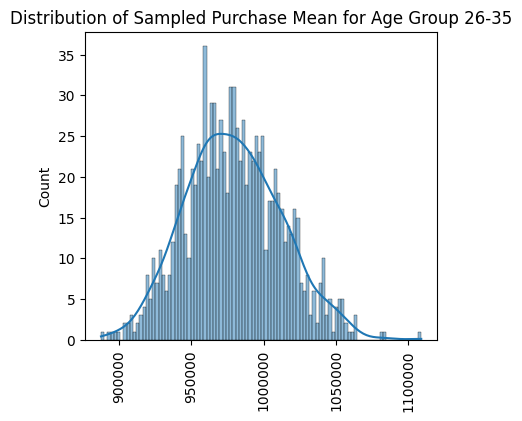



Age Group 26-35 Customers Mean Purchase By 90 % Confidence (924924.48, 1033361.6)
Age Group 26-35 Customers Mean Purchase By 95 % Confidence (914537.64, 1043748.44)
Age Group 26-35 Customers Mean Purchase By 99 % Confidence (894237.15, 1064048.93)





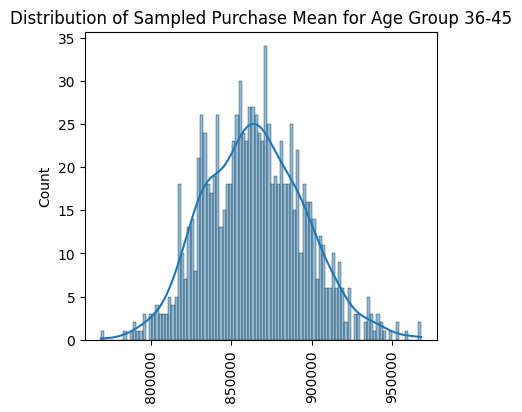



Age Group 36-45 Customers Mean Purchase By 90 % Confidence (813735.95, 915572.81)
Age Group 36-45 Customers Mean Purchase By 95 % Confidence (803981.33, 925327.43)
Age Group 36-45 Customers Mean Purchase By 99 % Confidence (784916.48, 944392.28)





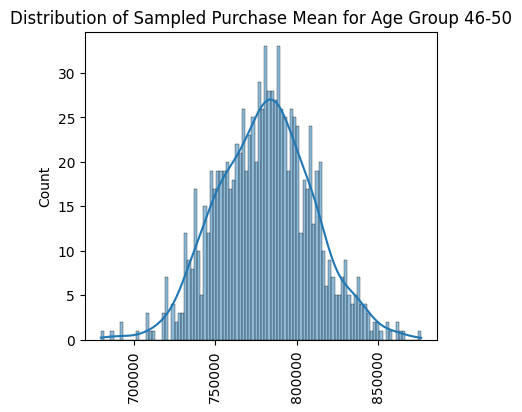



Age Group 46-50 Customers Mean Purchase By 90 % Confidence (732776.04, 828737.14)
Age Group 46-50 Customers Mean Purchase By 95 % Confidence (723584.24, 837928.95)
Age Group 46-50 Customers Mean Purchase By 99 % Confidence (705619.38, 855893.8)





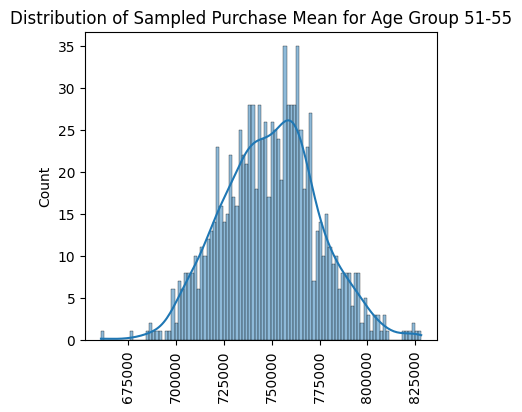



Age Group 51-55 Customers Mean Purchase By 90 % Confidence (708438.66, 790361.54)
Age Group 51-55 Customers Mean Purchase By 95 % Confidence (700591.53, 798208.66)
Age Group 51-55 Customers Mean Purchase By 99 % Confidence (685254.77, 813545.43)





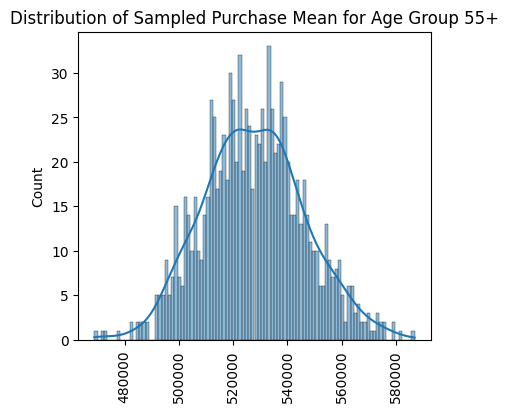



Age Group 55+ Customers Mean Purchase By 90 % Confidence (497210.36, 558215.98)
Age Group 55+ Customers Mean Purchase By 95 % Confidence (491366.83, 564059.51)
Age Group 55+ Customers Mean Purchase By 99 % Confidence (479945.98, 575480.36)





In [ ]:
age_intervals = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
for age_group in age_intervals:
  df_age_group = df_age[df_age['Age'] == age_group]
  df_age_group_means = getAgeGroupSampleMean(df_age_group)

  fig =  plt.figure(figsize=(10,4))
  plt.subplot(1,2,1)
  sns.histplot(data=df_age_group_means,  kde = True, bins=100)
  plt.title('Distribution of Sampled Purchase Mean for Age Group ' + age_group)
  plt.xticks(rotation=90)
  plt.ticklabel_format(style='plain', axis='x')
  plt.show()

  (lower_limit_90, upper_limit_90) = cal_CI(df_age_group_means , 90)
  (lower_limit_95, upper_limit_95) = cal_CI(df_age_group_means , 95)
  (lower_limit_99, upper_limit_99) = cal_CI(df_age_group_means , 99)

  print('\n')
  print('Age Group {} Customers Mean Purchase By 90 % Confidence ({}, {})'.format(age_group, round(lower_limit_90, 2), round(upper_limit_90, 2)))
  print('Age Group {} Customers Mean Purchase By 95 % Confidence ({}, {})'.format(age_group, round(lower_limit_95, 2), round(upper_limit_95, 2)))
  print('Age Group {} Customers Mean Purchase By 99 % Confidence ({}, {})'.format(age_group, round(lower_limit_99, 2), round(upper_limit_99, 2)))
  print('\n\n')

## **Actionable insights**

*   Male customers is 50% more then female customers.

*   Occupation 4, 0, 7, 1 and 17 are in top 5 total transaction.

*   Majority of the transactions are made by the customers whose age is between 26 and 45 years.

*  About 81.83% of the total transactions are made by customers of age between 18 and 50 years.

*   Out of all unique customers, 34.85 % belong to the age group of 26 - 35 years, 19.81 % belong to the age group of 36 - 45 years, 18.15 % belong to the age group of 18 - 25 years, 9.01 % belong to the age group of 46 - 50 years.

*   39.87 % of the total revenue is generated from the customers having age. group of 26 - 35 years, 20.15 % is generated from 36 - 45 years, 17.93 % from 18 - 25 years, 8.26 % from 46 - 50 years.

*   Out of all unique customers 71.72 % are male and 28.28 % is female.

*   76.72 % of total revenue is generated from male custmers and 23.28 % of total revenue is generated by female.

*   58 % unique customers are single and 42 % unique customers are merried.

*   59.05 % total revenue is generated from single customers and 40.95 % total revenue is generated by merried customers.

*   Majority of the total unique customers belong to the city C. 82.26 % of the total unique customers belong to city C and B.

*   Walmart generated 41.52 % of the total revenue from the customers belonging to the city B, 32.65 % from city C and 25.83 % from city A.

*   More than 35% customers are living in current city from past 1 year

*   More than 70% revenue is generated by 3 products only.

*   37.48 % of total revenue is generated by product category 1 , 18.48%  is by category 5 and 16.77 by  product category 8.

*   Product category 5 is most sold product.

*   Revenue median is 8047. Above 21400.5 are outliers.

*   Revenue does not follow normal distribution.

*   In All Ages , marital status , city category and stay in current city males customers transection is more than female.

*   Mean spend of male customers is more than female customers. because males have more count if occupation they earn more they spend more.

*   Also only occupation 18 have more spend in females than males even if very few female with occupation 18. it indicates occupation 18 pay well to females.

*   

 <h6> <b> Sample Purchase Mean After Outlier Treatment </b> </h6>
          
*  F = 703781.063025
*  M = 913870.843787

 <h6> <b> Mean Total Purchase Made Gender Category </b>  </h6>



*   Male Customers Mean Purchase By 90 % Confidence (857912.67, 966117.34)

*   Male Customers Mean Purchase By 95 % Confidence (847548.1, 976481.91)

*   Male Customers Mean Purchase By 99 % Confidence (827291.13, 996738.88)

*   Sample Mean for Male Customers 912015.00697 (Close to Actual Mean)

*   Female Customers Mean Purchase By 90 % Confidence (660003.85, 746019.35)

*   Female Customers Mean Purchase By 95 % Confidence (651764.7, 754258.49)

*   Female Customers Mean Purchase By 99 % Confidence (635661.76, 770361.44)

*   Sample Mean for Male Customers 703011.5993800001 (Close to Actual Mean)

  <b> Observation: </b>  Confidence intervals of average male and female spending are not overlapping. This trend can be changed via introducing female centric marketing strategies by Walmart so that more female customers are attracted to increase female purchases to achieve comparable statistics close to 50%.



 <h6> <b> Mean Total Purchase Made Marital Status Category </b>  </h6>



*  Single Customers Mean Purchase By 90 % Confidence (827650.85, 952545.18)

*  Single Customers Mean Purchase By 95 % Confidence (815687.62, 964508.41)

*  Single Customers Mean Purchase By 99 % Confidence (792306.18, 987889.85)

*  Sample Mean for Single Customers 890098.01526

*   Married Customers Mean Purchase By 90 % Confidence (651675.46, 883311.63)

*   Married Customers Mean Purchase By 95 % Confidence (629487.79, 905499.3)

*   Married Customers Mean Purchase By 99 % Confidence (586123.24, 948863.85)

*   Sample Mean for Married Customers 767493.5450100001



<b> Note: For Age Caegory Mean Total Purchase is Above. </b>













## **Recommendations**

*   Since the average total purchase made by males is greater than females, Walmart should give special attention to their choices of products so as to retain them.
*   Since 82.33 % of the total transactions are made by the customers belonging to the occupations 4, 0, 7, 1, 17, 20, 12, 14, 2, 16, 6, Walmart should keep on adding new quality products related to their field of work.

*   Since 82.43% of the total transactions are made for the Product Categories 5, 1, 8, 11 and 2, Walmart can earn more profits if they add new products in these product categories.

*   Since 76.72 % of the total revenue is generated from males, Walmart should give special discounts to males on occasions like International Men's Day (19th Nov).

*   As 39.87 % of the total revenue is generated from the customers having age group of 26 - 35 years and 20.15 % is generated from 36 - 45 years, Walmart should focus on acquisition of customers whose age is in between 26 and 45 years.

*   As Male customers in any category group median spend on is greater then Female. Walmart should put special attention to grow all over female customer as less then 25 % of all unique customers are female.

*   Since more than 35 % revenue come from new to city people (Stay in current city is 1 year) so walmart should try to retain these customers loyalty so in future they keep shopping from walmart only.





